# Tarea
## Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos disponibles.

# 1. Preparación de datos: División train/test


In [1]:
# Agregamos todos las librerias base con las que vamos a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Como vamos a dividir el dataset en Train y Test agregamos la libreria de sklearn
from sklearn.model_selection import train_test_split

In [3]:
# leemos el CSV y lo almacenamos en una variable
airbnb_full_df = pd.read_csv("./airbnb-listings-extract.csv", delimiter=";")

# Obtenemos la información del dataset
airbnb_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [4]:
#dividimos el dataset en Train y Test
train, test = train_test_split(airbnb_full_df, test_size=0.2, shuffle=True, random_state=0)

In [5]:
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


# 2. Análisis exploratorio, por ejemplo:
   ## a. Head, describe, dtypes, etc.
   ## b. Outliers
   ## c. Correlación

In [6]:
# Vamos a trabajar solamente con el dataset de train
airbnb_train = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')

In [7]:
# Mostramos los primeros datos de forma traspuesta
airbnb_train.head(3).T

0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                2.0   
Reviews per Month                                                             0.5   
Geolocation                                          40.4077318793,-3.68481869733   
Features                        Host Has Profile Pic,Is Location Exact,Require...   

                                                                                1  \
ID                                                                       14136180   
Listing Url                                 https://www.airbnb.com/rooms/14136180   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                                       The Palace Sol Madrid.   
...                                                                           ...   
Cancellation Policy                                                      flexible   
Calculated host listings count                                                1.0   
Reviews per Month                                                            2.43   
Geolocation                                          40.4158022422,-3.70534037765   
Features                        Host Has Profile Pic,Host Identity Verified,Re...   

                                                                                2  
ID                                                                       15520134  
Listing Url                                 https://www.airbnb.com/rooms/15520134  
Scrape ID                                                          20170407214119  
Last Scraped                                                           2017-04-08  
Name                               por persona la noche metro linea5 vista alegre  
...                                                                           ...  
Cancellation Policy                                                      moderate  
Calculated host listings count                                               16.0  
Reviews per Month                                                             NaN  
Geolocation                                          40.3890481626,-3.74037392557  
Features                        Host Has Profile Pic,Host Identity Verified,Is...  

[89 rows x 3 columns]

In [8]:
# Obtenemos la info del dataset
airbnb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Listing Url                     11824 non-null  object 
 2   Scrape ID                       11824 non-null  int64  
 3   Last Scraped                    11824 non-null  object 
 4   Name                            11823 non-null  object 
 5   Summary                         11355 non-null  object 
 6   Space                           8718 non-null   object 
 7   Description                     11818 non-null  object 
 8   Experiences Offered             11824 non-null  object 
 9   Neighborhood Overview           7309 non-null   object 
 10  Notes                           4543 non-null   object 
 11  Transit                         7243 non-null   object 
 12  Access                          

In [9]:
# Mostramos la cabecera traspuesta de solo los campos tipo "object"
airbnb_train.select_dtypes(include=['object']).head(3).T

0  \
Listing Url                                https://www.airbnb.com/rooms/5994463   
Last Scraped                                                         2017-04-08   
Name                                           PISO ATOCHA- FLAT NEAR ATOCHA  .   
Summary                       Piso recién reformado cómoda habitación con ba...   
Space                         Un piso muy cómodo en Jerónimos, una de las zo...   
Description                   Piso recién reformado cómoda habitación con ba...   
Experiences Offered                                                        none   
Neighborhood Overview         El barrio de Jeronimos es un enclave tranquilo...   
Notes                         Facilitamos guía de eventos y rutas turísticas...   
Transit                       Excelente ubicación a tan solo 5 minutos andan...   
Access                        La conexión a internet por fibra óptica 100 MB...   
Interaction                   Recibimos personalmente a nuestros huéspedes y...   
House Rules                   El apartamento se encuentra en un edificio res...   
Thumbnail Url                 https://a0.muscache.com/im/pictures/74652419/f...   
Medium Url                    https://a0.muscache.com/im/pictures/74652419/f...   
Picture Url                   https://public.opendatasoft.com/api/v2/catalog...   
XL Picture Url                https://a0.muscache.com/im/pictures/74652419/f...   
Host URL                             https://www.airbnb.com/users/show/31124866   
Host Name                                                                 Inava   
Host Since                                                           2015-04-13   
Host Location                         Arroyomolinos, Comunidad de Madrid, Spain   
Host About                                                                  NaN   
Host Response Time                                           within a few hours   
Host Acceptance Rate                                                        NaN   
Host Thumbnail Url            https://a0.muscache.com/im/users/31124866/prof...   
Host Picture Url              https://a0.muscache.com/im/users/31124866/prof...   
Host Neighbourhood                                                    Jerónimos   
Host Verifications                               email,phone,reviews,work_email   
Street                        Jerónimos, Madrid, Comunidad de Madrid 28014, ...   
Neighbourhood                                                         Jerónimos   
Neighbourhood Cleansed                                                Jerónimos   
Neighbourhood Group Cleansed                                             Retiro   
City                                                                     Madrid   
State                                                       Comunidad de Madrid   
Zipcode                                                                   28014   
Market                                                                   Madrid   
Smart Location                                                    Madrid, Spain   
Country Code                                                                 ES   
Country                                                                   Spain   
Property Type                                                         Apartment   
Room Type                                                       Entire home/apt   
Bed Type                                                               Real Bed   
Amenities                     TV,Internet,Wireless Internet,Air conditioning...   
Calendar Updated                                                    2 weeks ago   
Has Availability                                                            NaN   
Calendar last Scraped                                                2017-04-08   
First Review                                                         2015-04-26   
Last Review                                                          2017-02-28   
License    

In [10]:
# Obtenemos la info de los campos "object"
airbnb_train.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Listing Url                   11824 non-null  object
 1   Last Scraped                  11824 non-null  object
 2   Name                          11823 non-null  object
 3   Summary                       11355 non-null  object
 4   Space                         8718 non-null   object
 5   Description                   11818 non-null  object
 6   Experiences Offered           11824 non-null  object
 7   Neighborhood Overview         7309 non-null   object
 8   Notes                         4543 non-null   object
 9   Transit                       7243 non-null   object
 10  Access                        6663 non-null   object
 11  Interaction                   6592 non-null   object
 12  House Rules                   7681 non-null   object
 13  Thumbnail Url   

In [11]:
# Mostramos la cabecera traspuesta de los campos que NO son de tipo "object"
airbnb_train.select_dtypes(exclude=['object']).head(3).T

0             1             2
ID                              5.994463e+06  1.413618e+07  1.552013e+07
Scrape ID                       2.017041e+13  2.017041e+13  2.017041e+13
Host ID                         3.112487e+07  8.530132e+07  8.421324e+07
Host Response Rate              1.000000e+02  1.000000e+02  1.000000e+02
Host Listings Count             2.000000e+00  1.000000e+00  1.600000e+01
Host Total Listings Count       2.000000e+00  1.000000e+00  1.600000e+01
Latitude                        4.040773e+01  4.041580e+01  4.038905e+01
Longitude                      -3.684819e+00 -3.705340e+00 -3.740374e+00
Accommodates                    4.000000e+00  4.000000e+00  1.000000e+00
Bathrooms                       1.000000e+00  1.000000e+00  1.500000e+00
Bedrooms                        1.000000e+00  1.000000e+00  1.000000e+00
Beds                            2.000000e+00  2.000000e+00  8.000000e+00
Square Feet                              NaN           NaN           NaN
Price                           6.000000e+01  5.000000e+01  1.000000e+01
Weekly Price                    5.500000e+02           NaN           NaN
Monthly Price                   1.250000e+03           NaN           NaN
Security Deposit                         NaN           NaN           NaN
Cleaning Fee                    2.500000e+01  1.500000e+01  5.000000e+00
Guests Included                 1.000000e+00  1.000000e+00  1.000000e+00
Extra People                    0.000000e+00  0.000000e+00  0.000000e+00
Minimum Nights                  2.000000e+00  1.000000e+00  3.000000e+00
Maximum Nights                  1.125000e+03  1.125000e+03  3.000000e+01
Availability 30                 9.000000e+00  1.500000e+01  1.400000e+01
Availability 60                 3.200000e+01  3.900000e+01  4.400000e+01
Availability 90                 5.200000e+01  6.400000e+01  7.400000e+01
Availability 365                1.170000e+02  2.080000e+02  1.400000e+02
Number of Reviews               1.200000e+01  2.000000e+01  0.000000e+00
Review Scores Rating            9.500000e+01  9.100000e+01           NaN
Review Scores Accuracy          9.000000e+00  9.000000e+00           NaN
Review Scores Cleanliness       1.000000e+01  9.000000e+00           NaN
Review Scores Checkin           1.000000e+01  1.000000e+01           NaN
Review Scores Communication     1.000000e+01  1.000000e+01           NaN
Review Scores Location          1.000000e+01  1.000000e+01           NaN
Review Scores Value             9.000000e+00  1.000000e+01           NaN
Calculated host listings count  2.000000e+00  1.000000e+00  1.600000e+01
Reviews per Month               5.000000e-01  2.430000e+00           NaN

In [12]:
# Obtenemos la info de los campos que NO son "object"
airbnb_train.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11824 non-null  int64  
 1   Scrape ID                       11824 non-null  int64  
 2   Host ID                         11824 non-null  int64  
 3   Host Response Rate              10317 non-null  float64
 4   Host Listings Count             11821 non-null  float64
 5   Host Total Listings Count       11821 non-null  float64
 6   Latitude                        11824 non-null  float64
 7   Longitude                       11824 non-null  float64
 8   Accommodates                    11824 non-null  int64  
 9   Bathrooms                       11780 non-null  float64
 10  Bedrooms                        11804 non-null  float64
 11  Beds                            11787 non-null  float64
 12  Square Feet                     

In [13]:
# Obtenemos describe de los campos que NO son "object" y los mostramos traspuesto
airbnb_train.select_dtypes(exclude=['object']).describe().T

count          mean           std  \
ID                              11824.0  1.025308e+07  5.566485e+06   
Scrape ID                       11824.0  2.017038e+13  5.505346e+08   
Host ID                         11824.0  3.588310e+07  3.411993e+07   
Host Response Rate              10317.0  9.480372e+01  1.524708e+01   
Host Listings Count             11821.0  1.275442e+01  3.457890e+01   
Host Total Listings Count       11821.0  1.275442e+01  3.457890e+01   
Latitude                        11824.0  4.049163e+01  4.701030e+00   
Longitude                       11824.0 -3.776863e+00  1.401469e+01   
Accommodates                    11824.0  3.277486e+00  2.093973e+00   
Bathrooms                       11780.0  1.285229e+00  6.646911e-01   
Bedrooms                        11804.0  1.344290e+00  9.051803e-01   
Beds                            11787.0  2.049122e+00  1.623489e+00   
Square Feet                       474.0  3.964895e+02  6.711258e+02   
Price                           11809.0  7.371259e+01  7.162484e+01   
Weekly Price                     2881.0  3.784373e+02  1.947515e+02   
Monthly Price                    2869.0  1.432391e+03  1.236993e+03   
Security Deposit                 5052.0  1.893122e+02  1.160119e+02   
Cleaning Fee                     6974.0  3.207313e+01  3.127803e+01   
Guests Included                 11824.0  1.581614e+00  1.160518e+00   
Extra People                    11824.0  7.637601e+00  1.237349e+01   
Minimum Nights                  11824.0  3.109946e+00  1.342748e+01   
Maximum Nights                  11824.0  9.617321e+02  9.387641e+03   
Availability 30                 11824.0  8.949002e+00  9.340334e+00   
Availability 60                 11824.0  2.294926e+01  1.976273e+01   
Availability 90                 11824.0  3.980396e+01  2.966331e+01   
Availability 365                11824.0  2.022172e+02  1.280068e+02   
Number of Reviews               11824.0  2.266483e+01  3.809234e+01   
Review Scores Rating             9163.0  9.162818e+01  9.137614e+00   
Review Scores Accuracy           9143.0  9.410040e+00  9.380131e-01   
Review Scores Cleanliness        9148.0  9.320726e+00  1.004472e+00   
Review Scores Checkin            9136.0  9.623905e+00  8.040496e-01   
Review Scores Communication      9147.0  9.647863e+00  7.654499e-01   
Review Scores Location           9133.0  9.534655e+00  7.704208e-01   
Review Scores Value              9132.0  9.211345e+00  9.631307e-01   
Calculated host listings count  11820.0  9.615313e+00  2.379558e+01   
Reviews per Month                9285.0  1.873326e+00  1.869157e+00   

                                         min           25%           50%  \
ID                              1.986400e+04  5.510692e+06  1.125754e+07   
Scrape ID                       2.016010e+13  2.017041e+13  2.017041e+13   
Host ID                         1.745300e+04  6.855490e+06  2.454770e+07   
Host Response Rate              0.000000e+00  1.000000e+02  1.000000e+02   
Host Listings Count             0.000000e+00  1.000000e+00  2.000000e+00   
Host Total Listings Count       0.000000e+00  1.000000e+00  2.000000e+00   
Latitude                       -3.785118e+01  4.040976e+01  4.041933e+01   
Longitude                      -1.231244e+02 -3.707538e+00 -3.700763e+00   
Accommodates                    1.000000e+00  2.000000e+00  3.000000e+00   
Bathrooms                       0.000000e+00  1.000000e+00  1.000000e+00   
Bedrooms                        0.000000e+00  1.000000e+00  1.000000e+00   
Beds                            1.000000e+00  1.000000e+00  2.000000e+00   
Square Feet                     0.000000e+00  0.000000e+00  9.000000e+01   
Price                           9.000000e+00  3.400000e+01  5.500000e+01   
Weekly Price                    7.000000e+01  2.200000e+02  3.500000e+02   
Monthly Price                   2.500000e+02  7.200000e+02  1.200000e+03   
Security Deposit                0.000000e+00  1.000000e+02  1.500000e+02   
Cleaning Fee                    0.0000

In [14]:
# Revisamos si existen NAN para los campos numéricos
airbnb_train.select_dtypes(exclude=['object']).isnull().sum()

ID                                    0
Scrape ID                             0
Host ID                               0
Host Response Rate                 1507
Host Listings Count                   3
Host Total Listings Count             3
Latitude                              0
Longitude                             0
Accommodates                          0
Bathrooms                            44
Bedrooms                             20
Beds                                 37
Square Feet                       11350
Price                                15
Weekly Price                       8943
Monthly Price                      8955
Security Deposit                   6772
Cleaning Fee                       4850
Guests Included                       0
Extra People                          0
Minimum Nights                        0
Maximum Nights                        0
Availability 30                       0
Availability 60                       0
Availability 90                       0


In [15]:
# Revisamos si el porcentaje de NAN con respecto al total de datos
airbnb_train.select_dtypes(exclude=['object']).isnull().sum()/ airbnb_train.shape[0]*100

ID                                 0.000000
Scrape ID                          0.000000
Host ID                            0.000000
Host Response Rate                12.745264
Host Listings Count                0.025372
Host Total Listings Count          0.025372
Latitude                           0.000000
Longitude                          0.000000
Accommodates                       0.000000
Bathrooms                          0.372124
Bedrooms                           0.169147
Beds                               0.312923
Square Feet                       95.991204
Price                              0.126861
Weekly Price                      75.634303
Monthly Price                     75.735792
Security Deposit                  57.273342
Cleaning Fee                      41.018268
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                     0.000000
Availability 30                 

In [16]:
# Como debemos predecir el precio, no nos sirve tener registros con precios NAN 0 menores o iguales a CERO
# al ser tan solo el 0.13% del dataset podemos eliminar dichas filas, ya que la perdida no es significativa

# primer creamos una máscara y revisamos lo que estamos por eliminar
mask_price_isna_or_lte_zero = (airbnb_train['Price'].isna()) | (airbnb_train['Price'] <= 0)
airbnb_train[mask_price_isna_or_lte_zero]['Price']

321     NaN
1921    NaN
3287    NaN
3537    NaN
4183    NaN
4281    NaN
5075    NaN
5782    NaN
6953    NaN
8013    NaN
9145    NaN
9517    NaN
10429   NaN
11053   NaN
11200   NaN
Name: Price, dtype: float64

In [17]:
# creamos un nuevo data set sin los precios vacios (utilizando la máscara negada, para hacer el filtro opuesto)
mask_with_price = ~mask_price_isna_or_lte_zero
airbnb_train_with_price = airbnb_train[mask_with_price]

airbnb_train_with_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11809 non-null  int64  
 1   Listing Url                     11809 non-null  object 
 2   Scrape ID                       11809 non-null  int64  
 3   Last Scraped                    11809 non-null  object 
 4   Name                            11808 non-null  object 
 5   Summary                         11343 non-null  object 
 6   Space                           8707 non-null   object 
 7   Description                     11803 non-null  object 
 8   Experiences Offered             11809 non-null  object 
 9   Neighborhood Overview           7300 non-null   object 
 10  Notes                           4536 non-null   object 
 11  Transit                         7233 non-null   object 
 12  Access                          6654 

In [18]:
# Como siguiente paso, nos vamos a quedar solo con las columnas que NO son 'object'
# ya que consideramos que NO brindan información relevante o que no se pueda inferir utilizando el resto de las columnas
airbnb_train_with_price_exclude_object = airbnb_train_with_price.select_dtypes(exclude=['object'])
airbnb_train_with_price_exclude_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              11809 non-null  int64  
 1   Scrape ID                       11809 non-null  int64  
 2   Host ID                         11809 non-null  int64  
 3   Host Response Rate              10305 non-null  float64
 4   Host Listings Count             11806 non-null  float64
 5   Host Total Listings Count       11806 non-null  float64
 6   Latitude                        11809 non-null  float64
 7   Longitude                       11809 non-null  float64
 8   Accommodates                    11809 non-null  int64  
 9   Bathrooms                       11766 non-null  float64
 10  Bedrooms                        11789 non-null  float64
 11  Beds                            11773 non-null  float64
 12  Square Feet                     474 n

In [19]:
# Pasamos a revisar features que se pueden eliminar por ser parte del proceso de scraping
scraping_features = ['Scrape ID','Host ID','Host Response Rate','Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
airbnb_train_with_price_exclude_object[scraping_features]

Scrape ID    Host ID  Host Response Rate  Host Listings Count  \
0      20170407214119   31124866               100.0                  2.0   
1      20170407214119   85301317               100.0                  1.0   
2      20170407214119   84213235               100.0                 16.0   
3      20170407214119   15258781               100.0                114.0   
4      20170407214119    1706029               100.0                  2.0   
...               ...        ...                 ...                  ...   
11819  20170407214119  122631275               100.0                  1.0   
11820  20170407214119   30659838               100.0                  2.0   
11821  20170407214119   66354333               100.0                  1.0   
11822  20170407214119   77960515               100.0                  1.0   
11823  20170407214119   44699017               100.0                 14.0   

       Host Total Listings Count  Calculated host listings count  
0                            2.0                             2.0  
1                            1.0                             1.0  
2                           16.0                            16.0  
3                          114.0                            97.0  
4                            2.0                             2.0  
...                          ...                             ...  
11819                        1.0                             1.0  
11820                        2.0                             1.0  
11821                        1.0                             1.0  
11822                        1.0                             1.0  
11823                       14.0                            14.0  

[11809 rows x 6 columns]

In [20]:
# Como vemos que son irrelevantes para nuestro análisis las features que agrega el scraping
# procedemos a aliminar esas columnas
airbnb_train_with_price_exclude_object_and_drop_scraping = airbnb_train_with_price_exclude_object.drop(scraping_features, axis=1)
airbnb_train_with_price_exclude_object_and_drop_scraping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11809 non-null  int64  
 1   Latitude                     11809 non-null  float64
 2   Longitude                    11809 non-null  float64
 3   Accommodates                 11809 non-null  int64  
 4   Bathrooms                    11766 non-null  float64
 5   Bedrooms                     11789 non-null  float64
 6   Beds                         11773 non-null  float64
 7   Square Feet                  474 non-null    float64
 8   Price                        11809 non-null  float64
 9   Weekly Price                 2880 non-null   float64
 10  Monthly Price                2866 non-null   float64
 11  Security Deposit             5050 non-null   float64
 12  Cleaning Fee                 6967 non-null   float64
 13  Guests Included      

In [21]:
# Revisamos porcentaje de NAN
airbnb_train_with_price_exclude_object_and_drop_scraping.isnull().sum() / airbnb_train_with_price_exclude_object_and_drop_scraping.shape[0] * 100

ID                              0.000000
Latitude                        0.000000
Longitude                       0.000000
Accommodates                    0.000000
Bathrooms                       0.364129
Bedrooms                        0.169362
Beds                            0.304852
Square Feet                    95.986112
Price                           0.000000
Weekly Price                   75.611821
Monthly Price                  75.730375
Security Deposit               57.236006
Cleaning Fee                   41.002625
Guests Included                 0.000000
Extra People                    0.000000
Minimum Nights                  0.000000
Maximum Nights                  0.000000
Availability 30                 0.000000
Availability 60                 0.000000
Availability 90                 0.000000
Availability 365                0.000000
Number of Reviews               0.000000
Review Scores Rating           22.474384
Review Scores Accuracy         22.643746
Review Scores Cl

In [22]:
# Como vemos hay muchas columnas con altos porcentajes de NAN
# Vamos a proceder a eliminar todas las features que tengan más del 20% de NAN
# Ya que no vemos una forma clara de poder reemplazar los NAN por otro valor
features_with_many_NAN = ['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 
                         'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                         'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month']
airbnb_train_with_price_exclude_object_and_drop_scraping[features_with_many_NAN]

Square Feet  Weekly Price  Monthly Price  Security Deposit  \
0              NaN         550.0         1250.0               NaN   
1              NaN           NaN            NaN               NaN   
2              NaN           NaN            NaN               NaN   
3              NaN           NaN            NaN               NaN   
4              NaN           NaN            NaN               NaN   
...            ...           ...            ...               ...   
11819          NaN           NaN            NaN               NaN   
11820          NaN         455.0         1503.0             200.0   
11821          NaN         450.0            NaN               NaN   
11822          NaN           NaN            NaN               NaN   
11823          NaN           NaN            NaN               NaN   

       Cleaning Fee  Review Scores Rating  Review Scores Accuracy  \
0              25.0                  95.0                     9.0   
1              15.0                  91.0                     9.0   
2               5.0                   NaN                     NaN   
3               NaN                   NaN                     NaN   
4               NaN                  92.0                     9.0   
...             ...                   ...                     ...   
11819          16.0                   NaN                     NaN   
11820          30.0                  89.0                     9.0   
11821          30.0                  94.0                    10.0   
11822          25.0                  98.0                    10.0   
11823           NaN                  85.0                     8.0   

       Review Scores Cleanliness  Review Scores Checkin  \
0                           10.0                   10.0   
1                            9.0                   10.0   
2                            NaN                    NaN   
3                            NaN                    NaN   
4                            9.0                    9.0   
...                          ...                    ...   
11819                        NaN                    NaN   
11820                        9.0                    9.0   
11821                        9.0                   10.0   
11822                       10.0                   10.0   
11823                        8.0                   10.0   

       Review Scores Communication  Review Scores Location  \
0                             10.0                    10.0   
1                             10.0                    10.0   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                             10.0                     9.0   
...                            ...                     ...   
11819                          NaN                     NaN   
11820                         10.0                     9.0   
11821                         10.0                    10.0   
11822                         10.0                    10.0   
11823                          9.0                    10.0   

       Review Scores Value  Reviews per Month  
0                      9.0               0.50  
1                     10.0               2.43  
2                      NaN                NaN  
3                      NaN                NaN  
4                      9.0               2.08  
...                    ...                ...  
11819                  NaN                NaN  
11820                  9.0               2.92  
11821                 10.0               2.06  
11822                 10.0               3.39  
11823                  9.0               0.34  

[11809 rows x 13 columns]

In [23]:
airbnb_train_without_many_nan = airbnb_train_with_price_exclude_object_and_drop_scraping.drop(features_with_many_NAN, axis=1)
airbnb_train_without_many_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 11809 non-null  int64  
 1   Latitude           11809 non-null  float64
 2   Longitude          11809 non-null  float64
 3   Accommodates       11809 non-null  int64  
 4   Bathrooms          11766 non-null  float64
 5   Bedrooms           11789 non-null  float64
 6   Beds               11773 non-null  float64
 7   Price              11809 non-null  float64
 8   Guests Included    11809 non-null  int64  
 9   Extra People       11809 non-null  int64  
 10  Minimum Nights     11809 non-null  int64  
 11  Maximum Nights     11809 non-null  int64  
 12  Availability 30    11809 non-null  int64  
 13  Availability 60    11809 non-null  int64  
 14  Availability 90    11809 non-null  int64  
 15  Availability 365   11809 non-null  int64  
 16  Number of Reviews  11809 no

In [24]:
# Revisamos que contiene Bathrooms
airbnb_train_without_many_nan['Bathrooms'].unique()

array([1. , 1.5, 3. , 2. , nan, 0.5, 4. , 0. , 6. , 5.5, 8. , 2.5, 3.5,
       5. , 4.5, 7. , 6.5, 7.5])

In [25]:
# Revisamos que contiene Bedrooms
airbnb_train_without_many_nan['Bedrooms'].unique()

array([ 1.,  2.,  0.,  6.,  4.,  3.,  8.,  7.,  5., 10., nan])

In [26]:
# Revisamos que contiene Beds
airbnb_train_without_many_nan['Beds'].unique()

array([ 2.,  8.,  1.,  3., nan,  4., 10.,  9.,  5.,  6.,  7., 14., 11.,
       12., 16., 15., 13.])

In [27]:
# Como vemos, tanto Bathrooms como Bedrooms tienen O como valor mínimo, con lo cual utilizaremos este para completar los NAN
# Beds tiene 1 como valor mínimo, asi que utilizaremos este para completar los NAN
airbnb_train_without_many_nan['Bathrooms'] = airbnb_train_without_many_nan['Bathrooms'].fillna(0)
airbnb_train_without_many_nan['Bedrooms'] = airbnb_train_without_many_nan['Bedrooms'].fillna(0)
airbnb_train_without_many_nan['Beds'] = airbnb_train_without_many_nan['Beds'].fillna(1)

airbnb_train_without_many_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 11809 non-null  int64  
 1   Latitude           11809 non-null  float64
 2   Longitude          11809 non-null  float64
 3   Accommodates       11809 non-null  int64  
 4   Bathrooms          11809 non-null  float64
 5   Bedrooms           11809 non-null  float64
 6   Beds               11809 non-null  float64
 7   Price              11809 non-null  float64
 8   Guests Included    11809 non-null  int64  
 9   Extra People       11809 non-null  int64  
 10  Minimum Nights     11809 non-null  int64  
 11  Maximum Nights     11809 non-null  int64  
 12  Availability 30    11809 non-null  int64  
 13  Availability 60    11809 non-null  int64  
 14  Availability 90    11809 non-null  int64  
 15  Availability 365   11809 non-null  int64  
 16  Number of Reviews  11809 no

In [28]:
# Ahora que ya tenemos el dataset sin NAN pasamos a eliminar la feature ID ya que no es relevante para predecir los precios
# pues es solo un identificador unico de la propiedad
airbnb_train_clean = airbnb_train_without_many_nan.drop(['ID'], axis = 1)
airbnb_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           11809 non-null  float64
 1   Longitude          11809 non-null  float64
 2   Accommodates       11809 non-null  int64  
 3   Bathrooms          11809 non-null  float64
 4   Bedrooms           11809 non-null  float64
 5   Beds               11809 non-null  float64
 6   Price              11809 non-null  float64
 7   Guests Included    11809 non-null  int64  
 8   Extra People       11809 non-null  int64  
 9   Minimum Nights     11809 non-null  int64  
 10  Maximum Nights     11809 non-null  int64  
 11  Availability 30    11809 non-null  int64  
 12  Availability 60    11809 non-null  int64  
 13  Availability 90    11809 non-null  int64  
 14  Availability 365   11809 non-null  int64  
 15  Number of Reviews  11809 non-null  int64  
dtypes: float64(6), int64(10)
me

In [29]:
# obtenemos el nombre de las columnas
airbnb_train_clean.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews'],
      dtype='object')

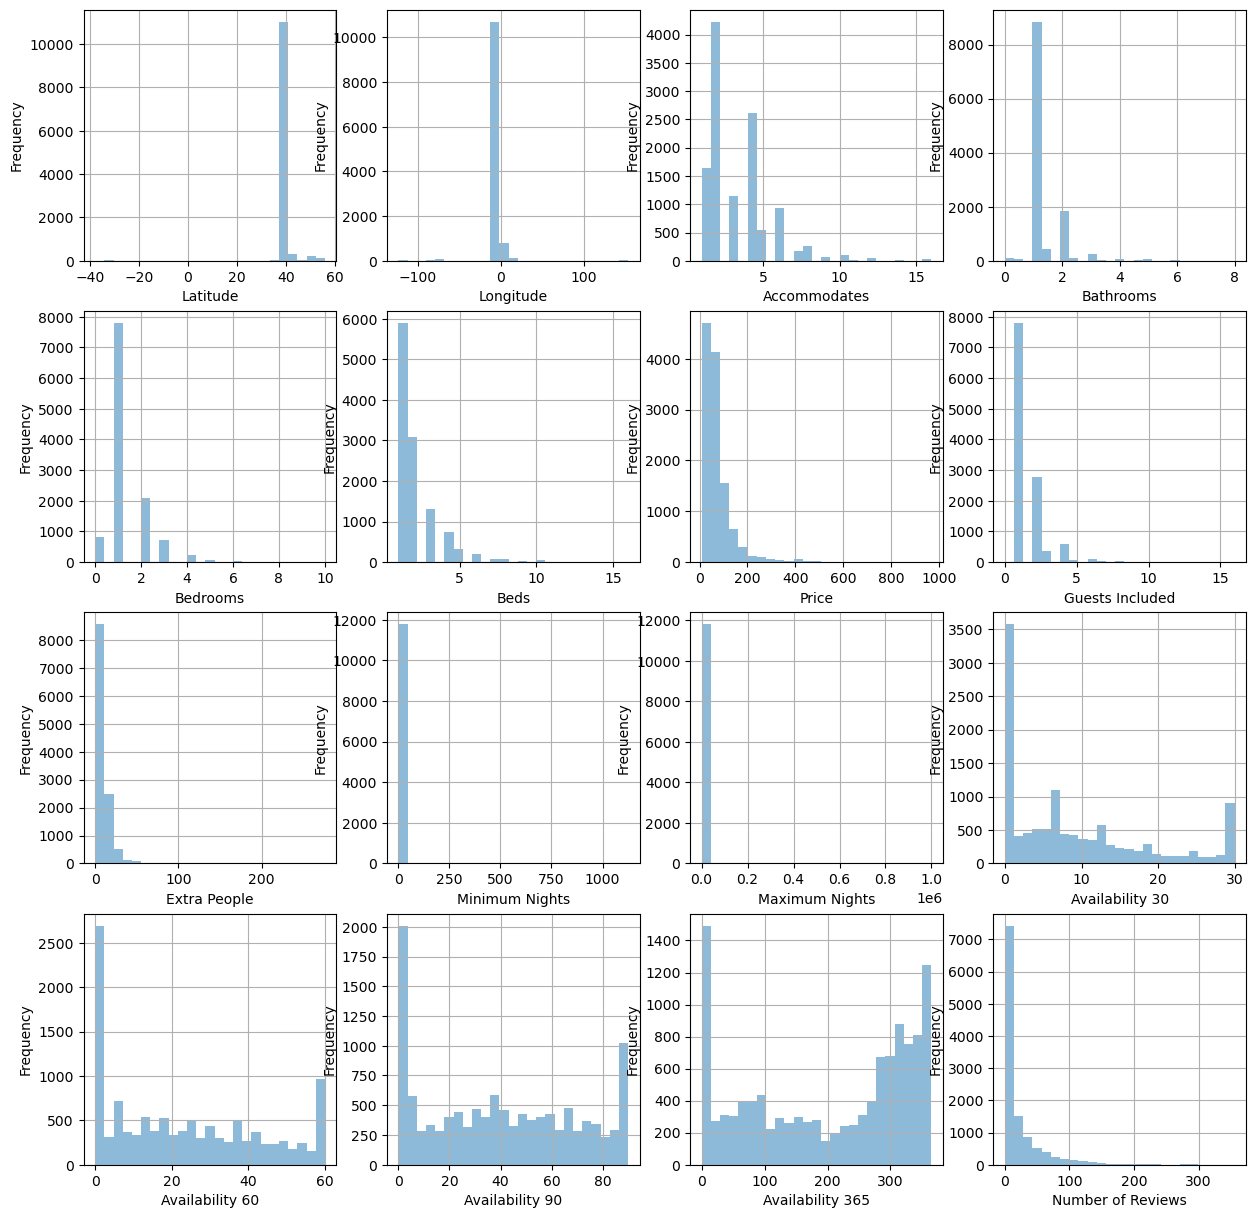

In [30]:
# histogramas
plt.figure(figsize=(15, 15))

plt.subplot(4,4,1)
airbnb_train_clean['Latitude'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Latitude')

plt.subplot(4,4,2)
airbnb_train_clean['Longitude'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Longitude')

plt.subplot(4,4,3)
airbnb_train_clean['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Accommodates')

plt.subplot(4,4,4)
airbnb_train_clean['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Bathrooms')

# segundos 4
plt.subplot(4,4,5)
airbnb_train_clean['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Bedrooms')

plt.subplot(4,4,6)
airbnb_train_clean['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Beds')

plt.subplot(4,4,7)
airbnb_train_clean['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Price')

plt.subplot(4,4,8)
airbnb_train_clean['Guests Included'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Guests Included')

# terceros 4
plt.subplot(4,4,9)
airbnb_train_clean['Extra People'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Extra People')

plt.subplot(4,4,10)
airbnb_train_clean['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Minimum Nights')

plt.subplot(4,4,11)
airbnb_train_clean['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Maximum Nights')

plt.subplot(4,4,12)
airbnb_train_clean['Availability 30'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Availability 30')

# ultimos 4
plt.subplot(4,4,13)
airbnb_train_clean['Availability 60'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Availability 60')

plt.subplot(4,4,14)
airbnb_train_clean['Availability 90'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Availability 90')

plt.subplot(4,4,15)
airbnb_train_clean['Availability 365'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Availability 365')

plt.subplot(4,4,16)
airbnb_train_clean['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
#plt.yscale("log")
plt.xlabel('Number of Reviews')


plt.show()

In [31]:
# obtenemos el nombre de las columnas
airbnb_train_clean.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews'],
      dtype='object')

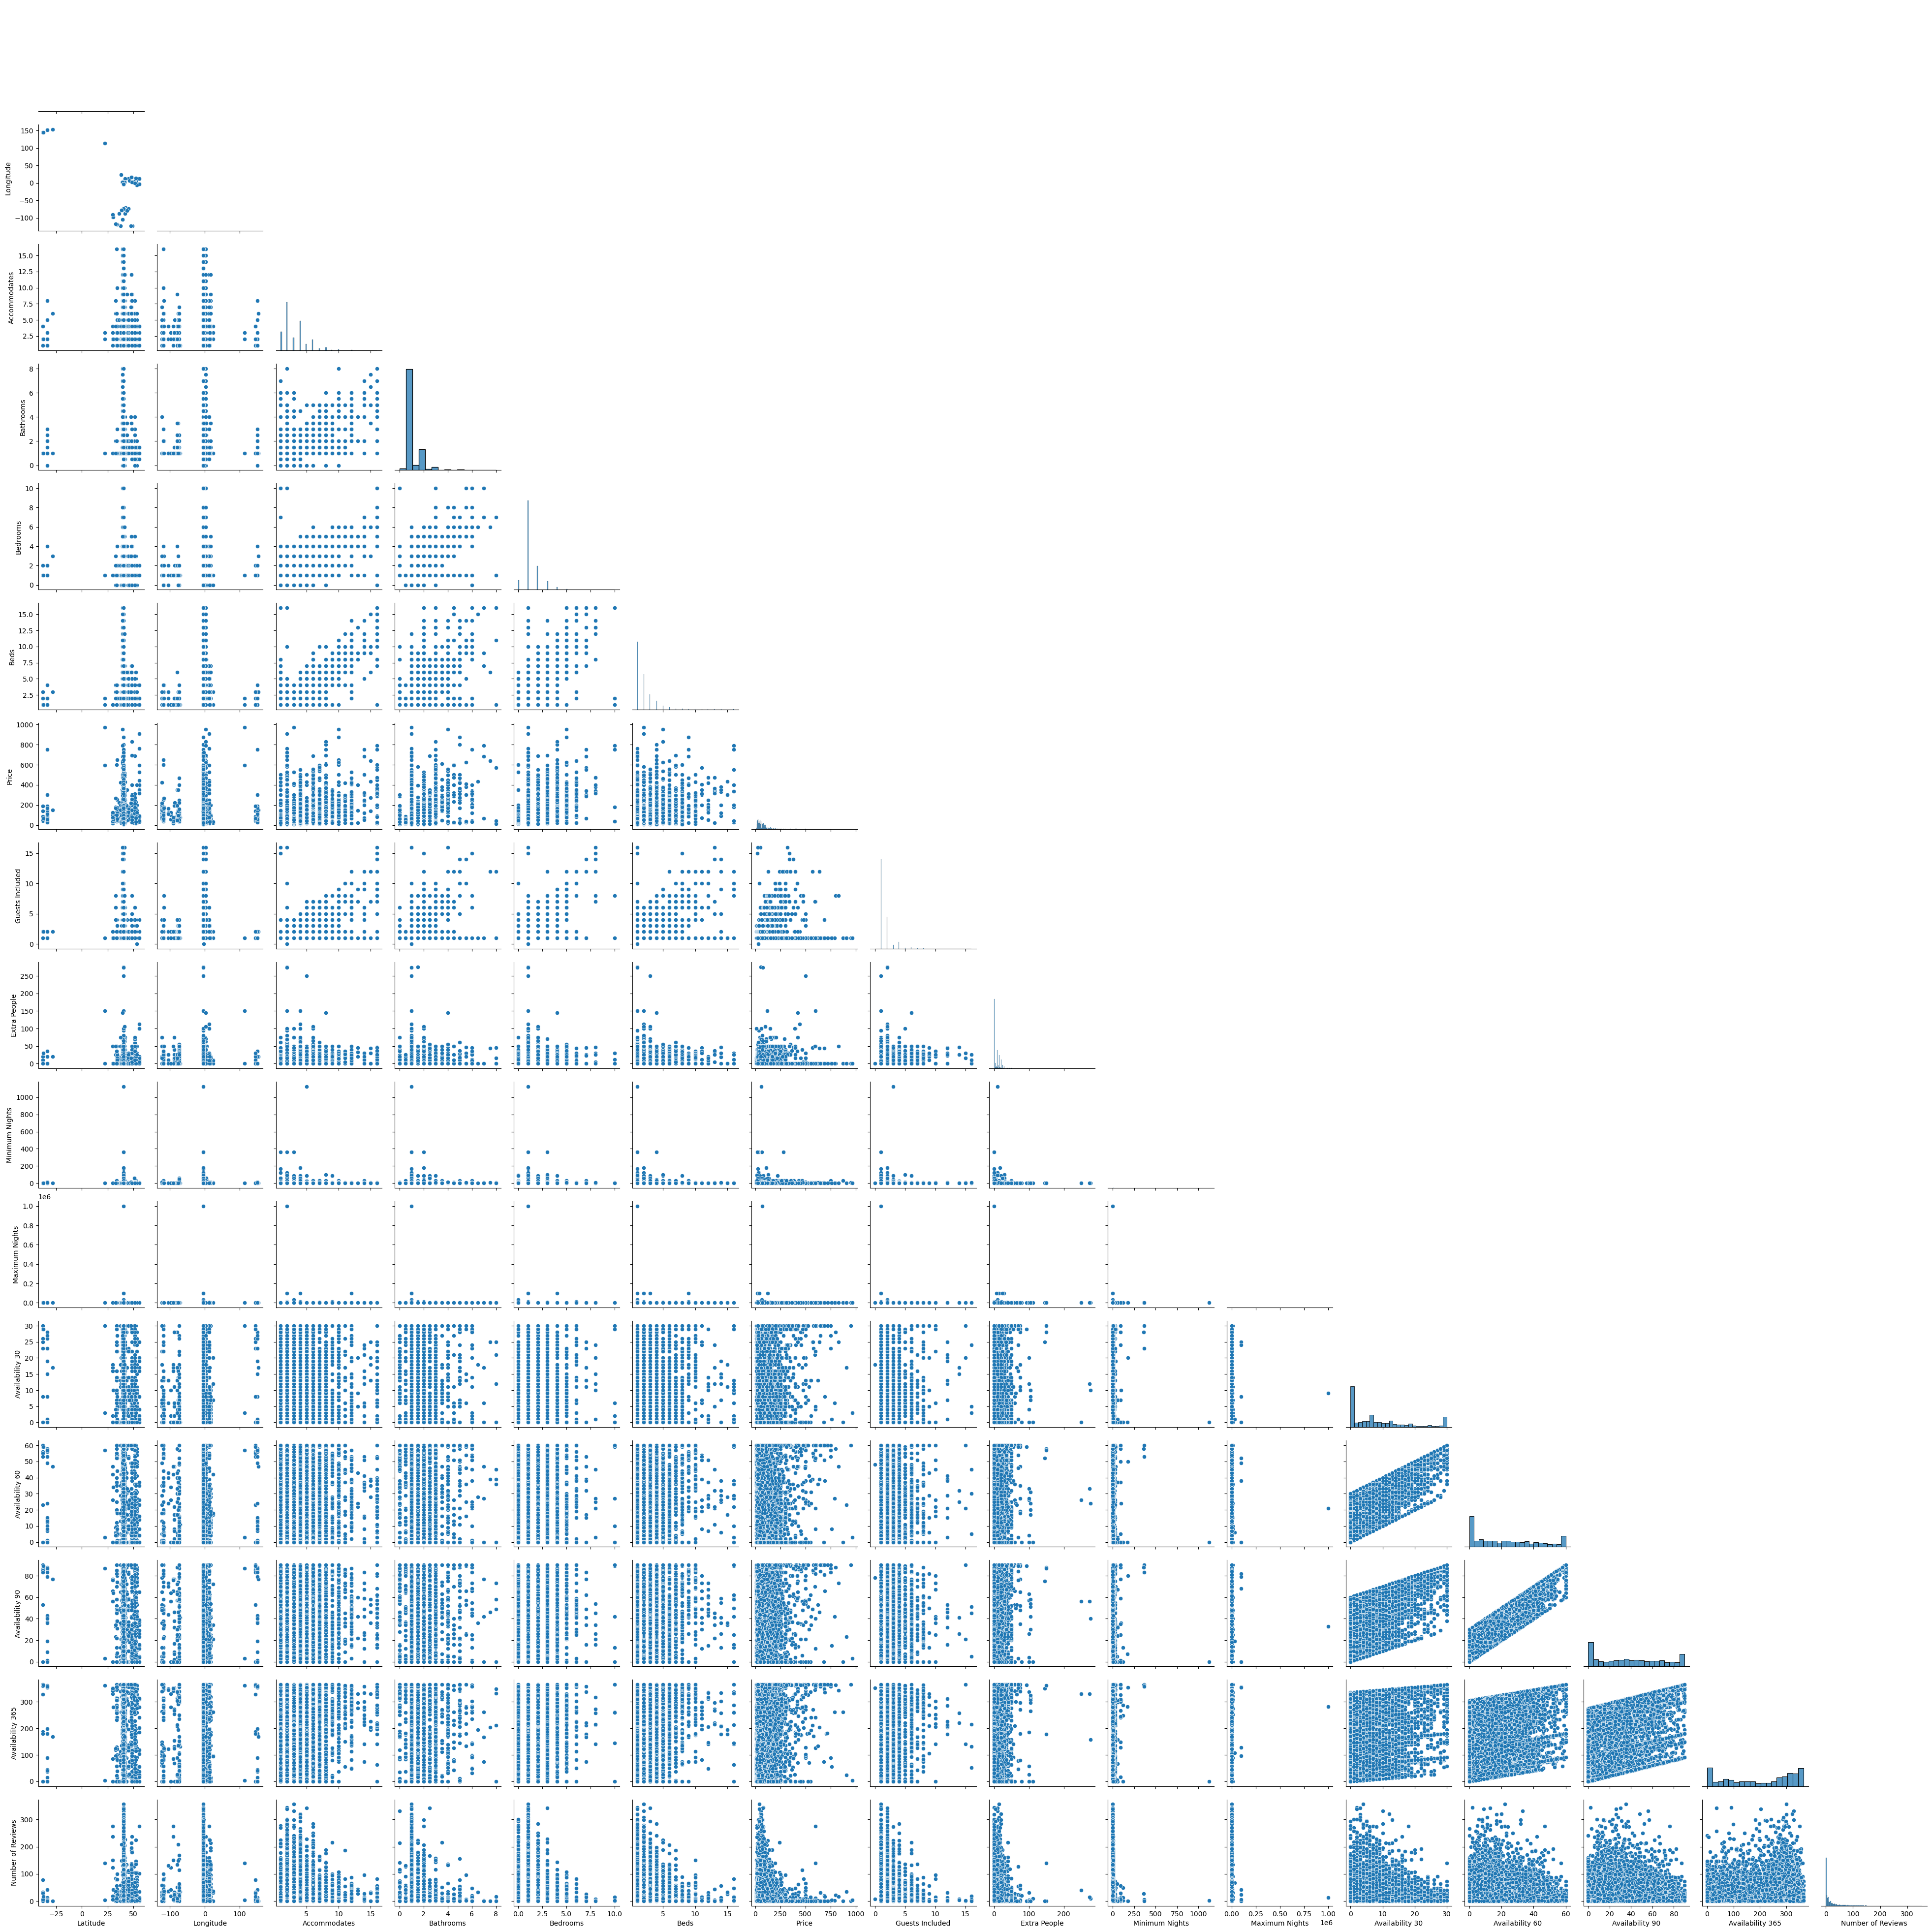

In [32]:
# Dibujamos pairplot
import seaborn as sns
sns.pairplot(airbnb_train_clean, corner=True)

/Users/juancarlosavalos/keepcoding/KeepCoding-IA-I/practices/KeepCoding-IA-I-Machine-Learning-Practice/.env/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/juancarlosavalos/keepcoding/KeepCoding-IA-I/practices/KeepCoding-IA-I-Machine-Learning-Practice/.env/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<Axes: >

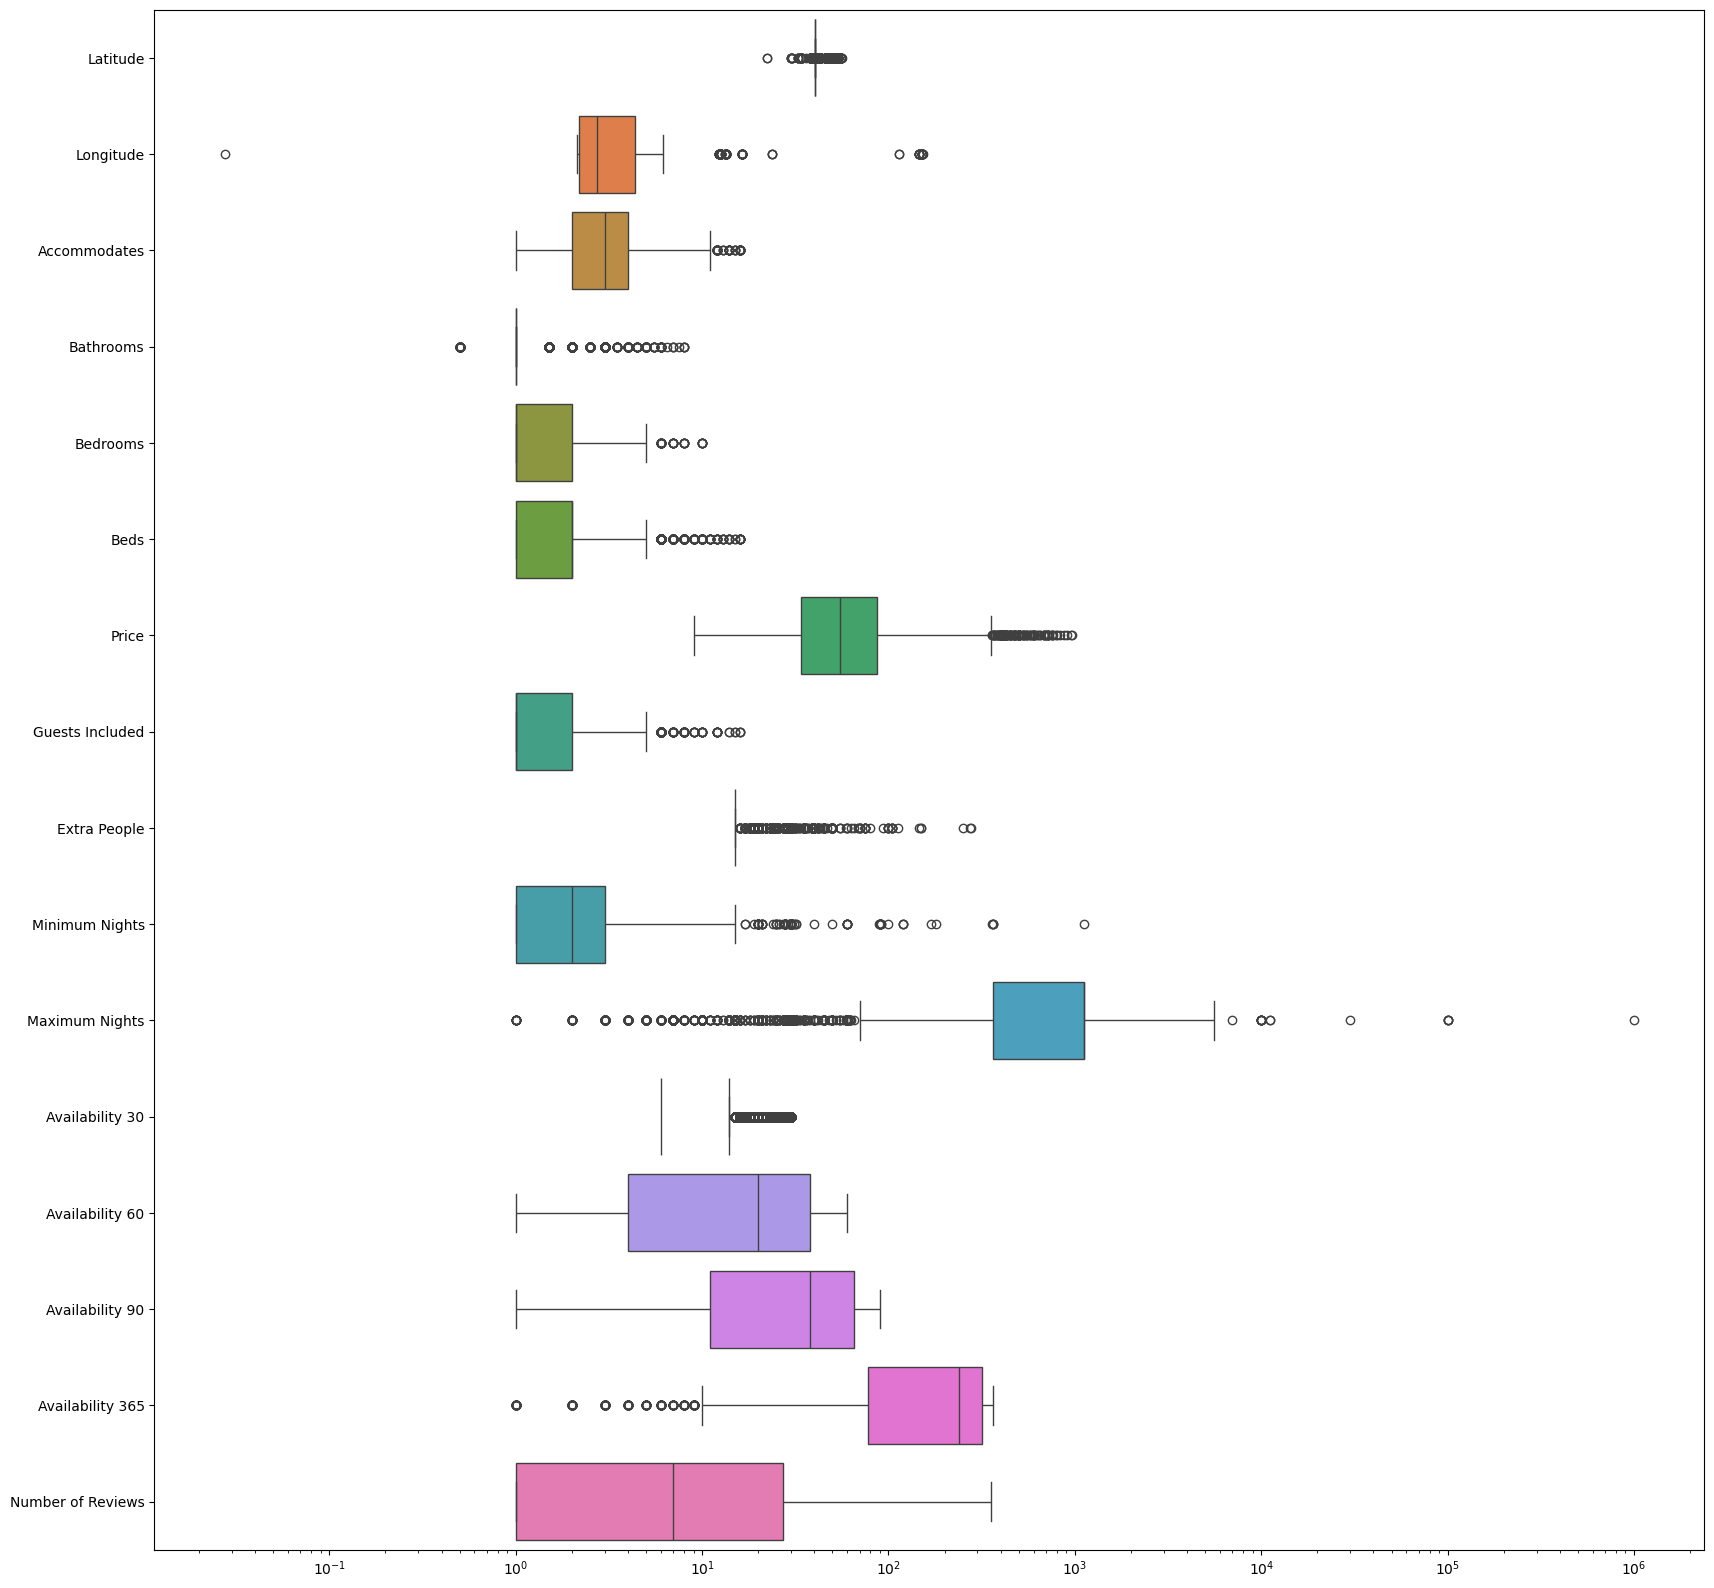

In [33]:
# boxplot
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(data=airbnb_train_clean, log_scale= True, orient='h', ax=ax)

In [34]:
# obtenemos el nombre de las columnas
airbnb_train_clean.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews'],
      dtype='object')

In [35]:
# Como podemos ver casi todas las features tienen posibles outliers
# vamos a ir una viendo los posibles outliers

# Latitude
tmp = airbnb_train_clean.sort_values(by='Latitude')
tmp['Latitude'].value_counts(sort=False)

Latitude
-37.851182    1
-37.839439    1
-37.839226    1
-37.815440    1
-37.814324    1
             ..
 55.945320    1
 55.945575    1
 55.945755    1
 55.956716    1
 55.966912    1
Name: count, Length: 11809, dtype: int64

In [36]:
# Latitude parece no contener reales OUTLIERS

# Longitude
tmp = airbnb_train_clean.sort_values(by='Longitude')
tmp['Longitude'].value_counts(sort=False)

Longitude
-123.124429    1
-122.437371    1
-122.430775    1
-122.429329    1
-122.427340    1
              ..
 151.274545    1
 151.275196    1
 151.276644    1
 151.285378    1
 153.371427    1
Name: count, Length: 11809, dtype: int64

In [37]:
# Longitude parece no contener reales OUTLIERS

# Accommodates
tmp = airbnb_train_clean.sort_values(by='Accommodates')
tmp['Accommodates'].value_counts(sort=False)

Accommodates
1     1634
2     4227
3     1140
4     2610
5      551
6      940
7      174
8      267
9       59
10      97
11      19
12      42
13       3
14      12
15       4
16      30
Name: count, dtype: int64

In [38]:
# Accommodates parece no contener reales OUTLIERS, si se ve que a partir de 5 la cantidad cae y a partir de 13 es más notorio

# Bathrooms
tmp = airbnb_train_clean.sort_values(by='Bathrooms')
tmp['Bathrooms'].value_counts(sort=False)

Bathrooms
0.0      96
0.5      56
1.0    8846
1.5     434
2.0    1829
2.5      98
3.0     258
3.5      22
4.0      62
4.5      19
5.0      50
5.5       7
6.0      23
6.5       1
7.0       3
7.5       1
8.0       4
Name: count, dtype: int64

In [39]:
# Bathrooms parece no contener reales OUTLIERS, si se ve que a partir de 3.5 la cantidad cae y a partir de 6.5 es más notorio

# Bedrooms
tmp = airbnb_train_clean.sort_values(by='Bedrooms')
tmp['Bedrooms'].value_counts(sort=False)

Bedrooms
0.0      834
1.0     7796
2.0     2084
3.0      732
4.0      240
5.0       74
6.0       29
7.0        8
8.0        6
10.0       6
Name: count, dtype: int64

In [40]:
# Bedrooms parece no contener reales OUTLIERS, si se ve que a partir de 5 la cantidad cae y a partir de 7 es más notorio

# Beds
tmp = airbnb_train_clean.sort_values(by='Beds')
tmp['Beds'].value_counts(sort=False)

Beds
1.0     5896
2.0     3083
3.0     1315
4.0      735
5.0      316
6.0      188
7.0       83
8.0       76
9.0       32
10.0      42
11.0       9
12.0       9
13.0       5
14.0       6
15.0       2
16.0      12
Name: count, dtype: int64

In [41]:
# Beds parece no contener reales OUTLIERS, si se ve que a partir de 7 la cantidad cae y a partir de 11 es más notorio
# Un caso super raro, es que para 16 tiene 12 apariciones. Siendo estas mas que para 11 Beds que tiene 9 apariciones

# Price
tmp = airbnb_train_clean.sort_values(by='Price')
tmp['Price'].value_counts(sort=False)

Price
9.0       1
10.0     37
11.0     24
12.0     33
13.0     19
         ..
828.0     1
875.0     1
907.0     1
950.0     1
969.0     1
Name: count, Length: 345, dtype: int64

In [42]:
# Price parece no contener reales OUTLIERS, si tiene valores elevados, pero NO se ve un GAP notorio

# Guests Included
tmp = airbnb_train_clean.sort_values(by='Guests Included')
tmp['Guests Included'].value_counts(sort=False)

Guests Included
0        1
1     7798
2     2778
3      355
4      598
5       79
6      113
7       23
8       34
9        6
10       8
12       9
14       2
15       2
16       3
Name: count, dtype: int64

In [43]:
# 'Guests Included' parece no contener reales OUTLIERS, si se ve que a partir de 5 la cantidad cae y a partir de 9 es más notorio

# Extra People
tmp = airbnb_train_clean.sort_values(by='Extra People')
tmp['Extra People'].value_counts(sort=False)

Extra People
0      6076
5       453
6        65
7        90
8       154
       ... 
145       1
150       2
250       1
274       1
276       1
Name: count, Length: 61, dtype: int64

In [44]:
# 'Extra People' La data que contiene NO es muy consistente y puede llegar a ser irrelevante para el precio.
# Puede llegar a ser una feature innecesaria

# Minimum Nights
tmp = airbnb_train_clean.sort_values(by='Minimum Nights')
tmp['Minimum Nights'].value_counts(sort=False)

Minimum Nights
1       3987
2       4015
3       1951
4        499
5        501
6         95
7        360
8          7
9          5
10       128
11         1
12        12
13         3
14        33
15        53
17         2
19         1
20        22
21         5
24         1
25         4
26         2
27         1
28        10
29         1
30        74
31         2
32         2
40         1
50         1
60         7
89         1
90         9
91         2
99         1
120        3
170        1
180        1
360        1
365        3
1125       1
Name: count, dtype: int64

In [45]:
# 'Minimum Nights' La data que contiene NO es muy consistente y puede llegar a ser irrelevante para el precio.
# Puede llegar a ser una feature innecesaria. Tiene un claro OUTLIER que es 1125

# Maximum Nights
tmp = airbnb_train_clean.sort_values(by='Maximum Nights')
tmp['Maximum Nights'].value_counts(sort=False)

Maximum Nights
1          11
2          32
3          81
4          71
5          99
           ..
10000       4
11111       2
30000       1
99999       4
1000000     1
Name: count, Length: 160, dtype: int64

In [46]:
# 'Maximum Nights' La data que contiene NO es muy consistente y puede llegar a ser irrelevante para el precio.
# Puede llegar a ser una feature innecesaria. Tiene un OUTLIER claro en 1000000
# Y se podría llegar a quitar todos los mayores a 10000

# Availability 30
tmp = airbnb_train_clean.sort_values(by='Availability 30')
tmp['Availability 30'].value_counts(sort=False)

Availability 30
0     3169
1      408
2      416
3      457
4      517
5      519
6      523
7      573
8      445
9      427
10     365
11     348
12     320
13     259
14     271
15     227
16     222
17     180
18     170
19     126
20     134
21     113
22     112
23     104
24     103
25      87
26      92
27      89
28     123
29     262
30     648
Name: count, dtype: int64

In [47]:
# 'Availability 30' NO cintiene OUTLIERS

# Availability 60
tmp = airbnb_train_clean.sort_values(by='Availability 60')
tmp['Availability 60'].value_counts(sort=False)

Availability 60
0     2327
1      176
2      190
3      141
4      175
      ... 
56      76
57      84
58     115
59     250
60     606
Name: count, Length: 61, dtype: int64

In [48]:
# 'Availability 60' NO cintiene OUTLIERS

# Availability 90
tmp = airbnb_train_clean.sort_values(by='Availability 90')
tmp['Availability 90'].value_counts(sort=False)

Availability 90
0     1703
1      117
2       92
3       98
4      129
      ... 
86      69
87      83
88     113
89     246
90     578
Name: count, Length: 91, dtype: int64

In [49]:
# 'Availability 90' NO cintiene OUTLIERS

# Availability 365
tmp = airbnb_train_clean.sort_values(by='Availability 365')
tmp['Availability 365'].value_counts(sort=False)

Availability 365
0      1082
1        38
2        47
3        43
4        34
       ... 
361      43
362      51
363      72
364     154
365     475
Name: count, Length: 366, dtype: int64

In [50]:
# 'Availability 365' NO cintiene OUTLIERS

# Number of Reviews
tmp = airbnb_train_clean.sort_values(by='Number of Reviews')
tmp['Number of Reviews'].value_counts(sort=False)

Number of Reviews
0      2532
1      1014
2       633
3       496
4       433
       ... 
331       1
339       1
343       1
344       1
356       1
Name: count, Length: 250, dtype: int64

In [51]:
# 'Number of Reviews' no parece tener OUTLIERS

In [52]:
# Por el momento NO vamos a eliminar OUTLIERS ya que NO queda muy claro cuales on OUTLIERS perjudiciales para nuestro entrenamiento

In [53]:
# matriz de correlación
airbnb_train_clean.corr()

Latitude  Longitude  Accommodates  Bathrooms  Bedrooms  \
Latitude           1.000000  -0.495981      0.005882  -0.006539 -0.010958   
Longitude         -0.495981   1.000000      0.017722   0.026506  0.038741   
Accommodates       0.005882   0.017722      1.000000   0.427778  0.720749   
Bathrooms         -0.006539   0.026506      0.427778   1.000000  0.512597   
Bedrooms          -0.010958   0.038741      0.720749   0.512597  1.000000   
Beds              -0.000140   0.033670      0.835636   0.470077  0.724768   
Price             -0.013221   0.004976      0.528380   0.375451  0.492037   
Guests Included    0.004832  -0.007579      0.565060   0.239885  0.435358   
Extra People       0.018927  -0.051065      0.251381   0.082505  0.133343   
Minimum Nights    -0.003329  -0.004350      0.006699   0.030468  0.020892   
Maximum Nights    -0.000019   0.002381      0.001253  -0.002910  0.000330   
Availability 30   -0.019709   0.010485     -0.018380   0.028613  0.026113   
Availability 60   -0.022353   0.004847     -0.029403   0.001222 -0.000768   
Availability 90   -0.024630  -0.000227     -0.048856  -0.013201 -0.024620   
Availability 365  -0.006494  -0.008727      0.078193   0.010055  0.026289   
Number of Reviews  0.018791  -0.023831      0.058080  -0.075033 -0.048407   

                       Beds     Price  Guests Included  Extra People  \
Latitude          -0.000140 -0.013221         0.004832      0.018927   
Longitude          0.033670  0.004976        -0.007579     -0.051065   
Accommodates       0.835636  0.528380         0.565060      0.251381   
Bathrooms          0.470077  0.375451         0.239885      0.082505   
Bedrooms           0.724768  0.492037         0.435358      0.133343   
Beds               1.000000  0.437660         0.456701      0.186302   
Price              0.437660  1.000000         0.296850      0.104672   
Guests Included    0.456701  0.296850         1.000000      0.358659   
Extra People       0.186302  0.104672         0.358659      1.000000   
Minimum Nights     0.007440  0.029632         0.003170     -0.019904   
Maximum Nights     0.001254  0.000851        -0.004526     -0.003589   
Availability 30    0.040646  0.106314        -0.052963      0.048511   
Availability 60    0.023930  0.064655        -0.050026      0.058542   
Availability 90    0.000971  0.032864        -0.053600      0.062635   
Availability 365   0.088985  0.057354         0.060482      0.115522   
Number of Reviews  0.017819 -0.055834         0.100297      0.077969   

                   Minimum Nights  Maximum Nights  Availability 30  \
Latitude                -0.003329       -0.000019        -0.019709   
Longitude               -0.004350        0.002381         0.010485   
Accommodates             0.006699        0.001253        -0.018380   
Bathrooms                0.030468       -0.002910         0.028613   
Bedrooms                 0.020892        0.000330         0.026113   
Beds                     0.007440        0.001254         0.040646   
Price                    0.029632        0.000851         0.106314   
Guests Included          0.003170       -0.004526        -0.052963   
Extra People            -0.019904       -0.003589         0.048511   
Minimum Nights           1.000000       -0.001074        -0.013224   
Maximum Nights          -0.001074        1.000000         0.001938   
Availability 30         -0.013224        0.001938         1.000000   
Availability 60         -0.021529        0.000602         0.922478   
Availability 90         -0.021914       -0.000583         0.850336   
Availability 365         0.004092        0.010883         0.438621   
Number of Reviews       -0.037638       -0.006014        -0.129583   

                   Availability 60  Availability 90  Availability 365  \
Latitude                 -0.022353        -0.024630         -0.006494   
Longitude                 0.004847        -0.000227         -0.008727   
Accommodates             -0.029403        -0.048856          0.078193   
B

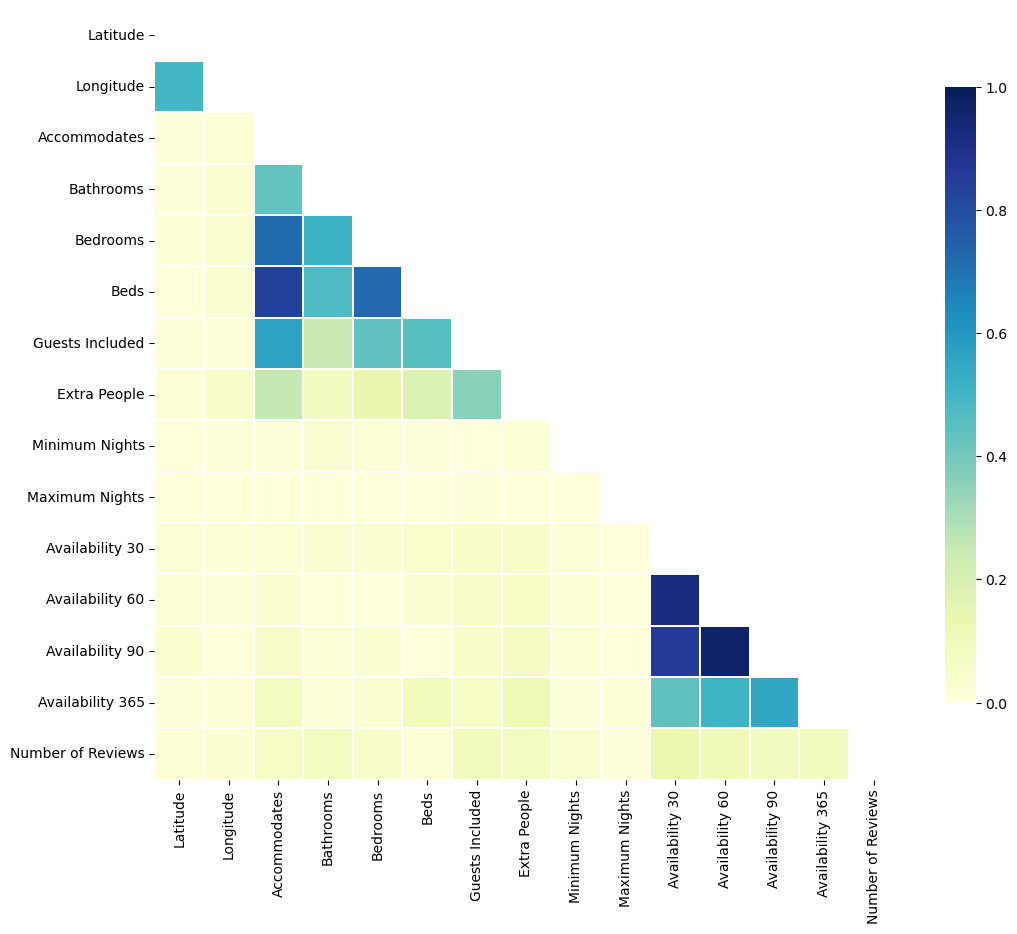

In [54]:
# Grafica de MATRIZ de CORRELACION

# Compute the correlation matrix
corr = np.abs(airbnb_train_clean.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [55]:
# Vemos las siguientes correlaciones

# Latitude - Longitude

# Accommodates - Bathrooms
# Accommodates - Bedrooms
# Accommodates - Beds (muy fuerte)
# Accommodates - Guests Included

# Bathrooms - Bedrooms
# Bathrooms - Beds

# Bedrooms - Beds
# Bedrooms - Guests Included

# Beds - Guests Included

# Guests Included - Extra People

# Availability 30 - Availability 60 (muy fuerte)
# Availability 30 - Availability 90 (fuerte)
# Availability 30 - Availability 365

# Availability 60 - Availability 90 (muy fuerte)
# Availability 60 - Availability 365

# Availability 90 - Availability 365


In [56]:
# Las features que tienen muy baja correlación son

# Minimum Nights
# Maximum Nights
# Number of Reviews

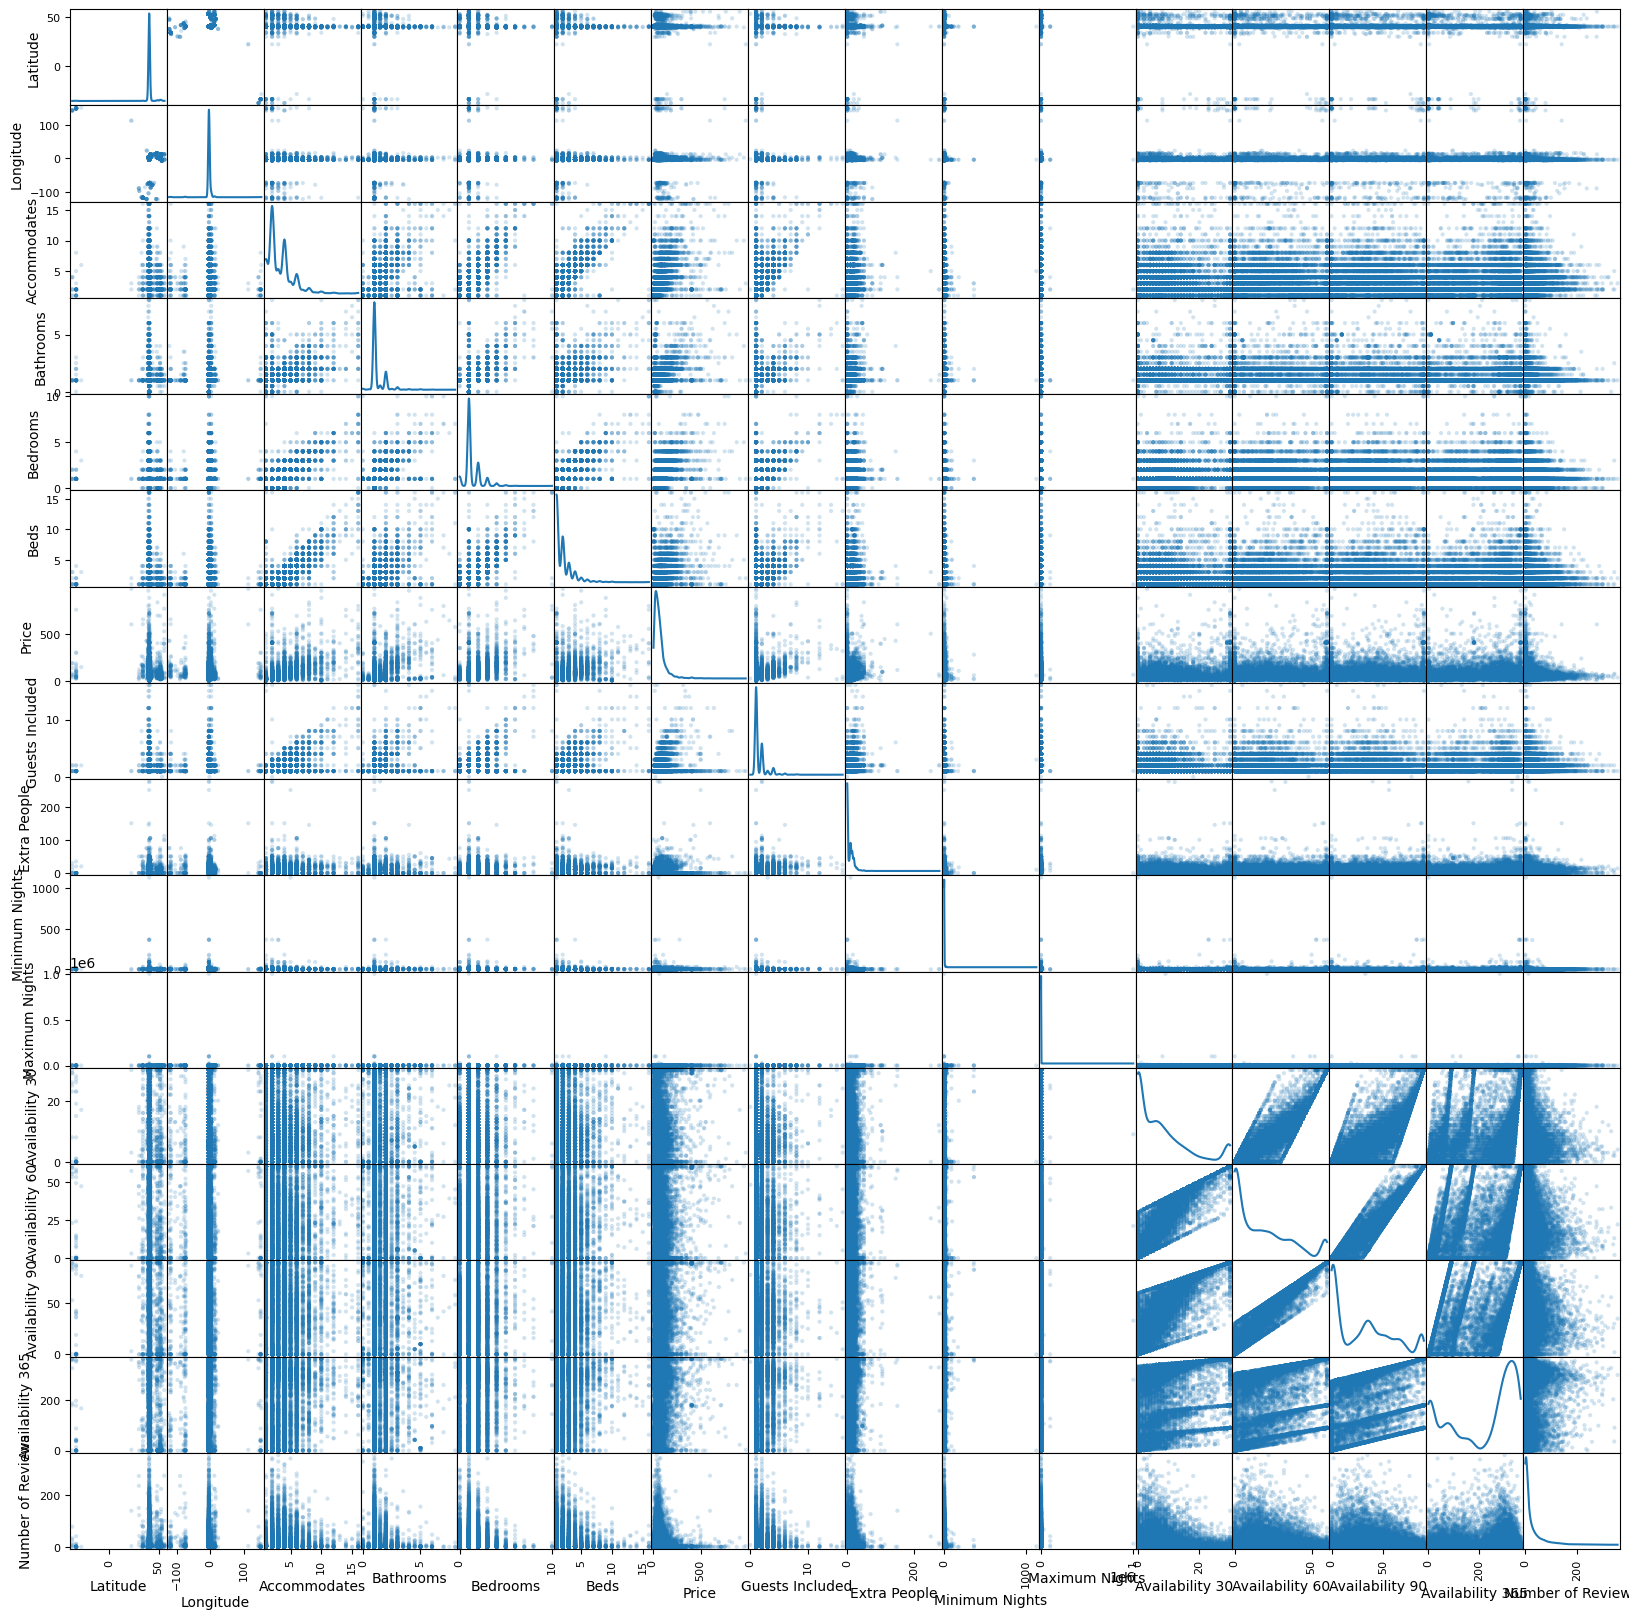

In [57]:
#Scatter plot de todas las features contra todas
pd.plotting.scatter_matrix(airbnb_train_clean, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## 3. Preprocesamiento:
### a. Eliminación de variables, mediante selección (random forest/Lasso), alta correlación, alto porcentaje de missings, o el método que se considere oportuno.
### b. Generación de variables

In [58]:
# Revisión selección de características

# importamos lo necesario desde sklearn
from sklearn.feature_selection import f_regression, mutual_info_regression


# Como el dataset ya tiene columnas eliminadas y datos completados
# Podemos seguir analizando sin realizar ninguna modificación

# convertimos el DataFrame al formato necesario para scikit-learn
data = airbnb_train_clean.values 

In [59]:
airbnb_train_clean.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews'],
      dtype='object')

In [60]:
y = data[:, 6]     # nos quedamos con la 1ª columna, price
y

array([60., 50., 10., ..., 69., 69., 25.])

In [61]:
airbnb_train_clean['Price']

0        60.0
1        50.0
2        10.0
3        30.0
4        32.0
         ... 
11819    52.0
11820    55.0
11821    69.0
11822    69.0
11823    25.0
Name: Price, Length: 11809, dtype: float64

In [62]:
rest_of_columns = [0,1,2,3,4,5, # 6 - Es price y no la vamos a agregar
                   7,8,9,10,11,12,13,14,15]
X = data[:,rest_of_columns]      # nos quedamos con el resto
X

array([[ 40.40773188,  -3.6848187 ,   4.        , ...,  52.        ,
        117.        ,  12.        ],
       [ 40.41580224,  -3.70534038,   4.        , ...,  64.        ,
        208.        ,  20.        ],
       [ 40.38904816,  -3.74037393,   1.        , ...,  74.        ,
        140.        ,   0.        ],
       ...,
       [ 40.41627101,  -3.71309253,   2.        , ...,  23.        ,
         23.        ,  24.        ],
       [ 40.41339712,  -3.71128019,   2.        , ...,  48.        ,
        139.        ,  19.        ],
       [ 40.43101097,  -3.6777691 ,   1.        , ...,  66.        ,
        341.        ,   4.        ]])

In [63]:
X.shape

(11809, 15)

In [64]:
y.shape

(11809,)

In [65]:
feature_names = airbnb_train_clean.columns[rest_of_columns]
feature_names

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews'],
      dtype='object')

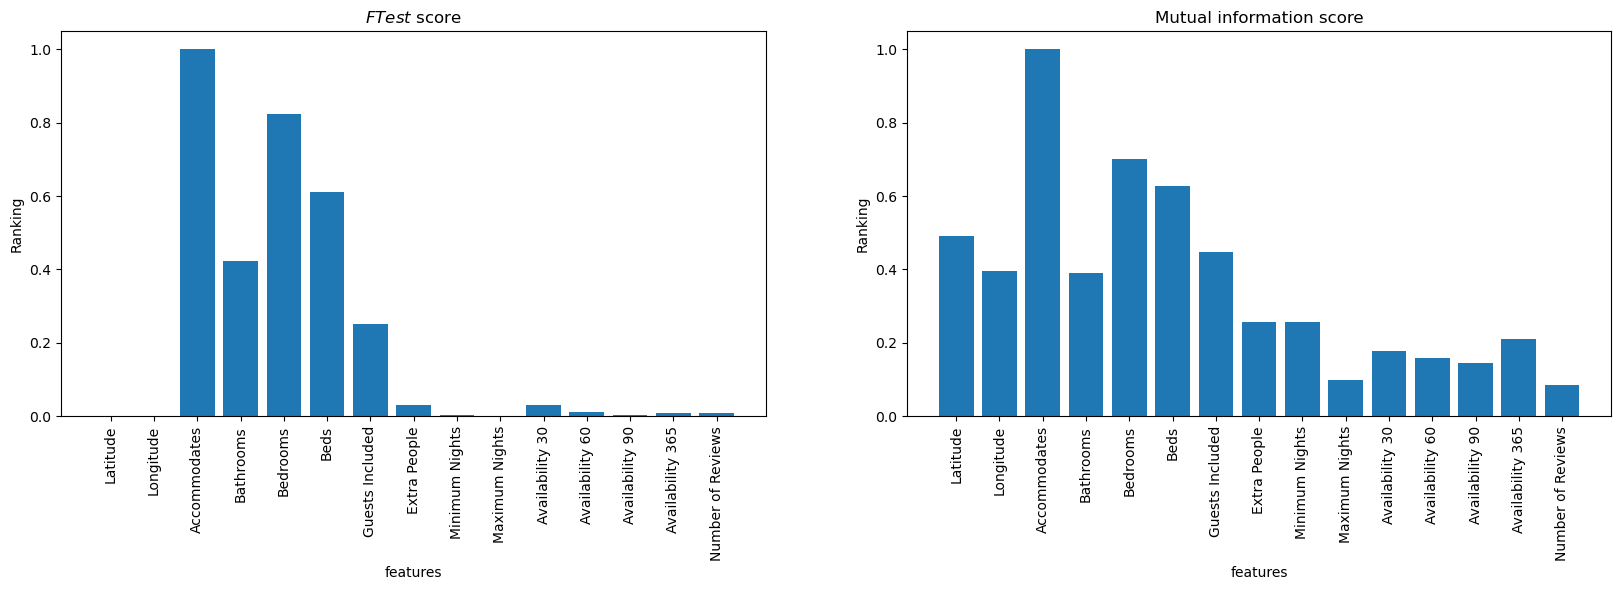

In [66]:
# estudiamos los dos métodos de filtrado
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# visualización
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [67]:
# Por lo que podemos ver el FTest nos indica que las mas preponderantes son
# Accommodates
# Bedrooms
# Beds
# Bathrooms
# Guests Included

In [68]:
# Y Mirando el mutual score, a las anteriores podemos agregar
# Latitude
# Longitude

In [69]:
# Con lo cual, si lo desearamos no podríamos queda solamente con
# Accommodates, Bedrooms, Beds, Bathrooms, Guests Included, Latitude, Longitude

# Por el momento NO vamos a filtrar el dataset para quedarnos con esas features

In [70]:

# Ahora probamos de crear dos nuevas features, una que represente los bedrooms al cuadrado
# y la otra representa la relación Bedrooms multiplicado por Badthrooms
airbnb_train_clean['Bedrooms_Squared'] = airbnb_train_clean['Bedrooms'].apply(lambda x: x**2)
airbnb_train_clean['Bed_Bath_Rooms'] = airbnb_train_clean['Bedrooms']*airbnb_train_clean['Bathrooms']
airbnb_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           11809 non-null  float64
 1   Longitude          11809 non-null  float64
 2   Accommodates       11809 non-null  int64  
 3   Bathrooms          11809 non-null  float64
 4   Bedrooms           11809 non-null  float64
 5   Beds               11809 non-null  float64
 6   Price              11809 non-null  float64
 7   Guests Included    11809 non-null  int64  
 8   Extra People       11809 non-null  int64  
 9   Minimum Nights     11809 non-null  int64  
 10  Maximum Nights     11809 non-null  int64  
 11  Availability 30    11809 non-null  int64  
 12  Availability 60    11809 non-null  int64  
 13  Availability 90    11809 non-null  int64  
 14  Availability 365   11809 non-null  int64  
 15  Number of Reviews  11809 non-null  int64  
 16  Bedrooms_Squared   11809 no

In [71]:
airbnb_train_clean['Bedrooms_Squared'].value_counts()

Bedrooms_Squared
1.0      7796
4.0      2084
0.0       834
9.0       732
16.0      240
25.0       74
36.0       29
49.0        8
64.0        6
100.0       6
Name: count, dtype: int64

In [72]:
airbnb_train_clean['Bed_Bath_Rooms'].value_counts()

Bed_Bath_Rooms
1.0     6493
2.0     2013
0.0      930
4.0      682
3.0      387
6.0      369
1.5      276
12.0      94
8.0       88
9.0       72
5.0       65
4.5       60
0.5       54
7.5       35
10.0      35
16.0      21
2.5       21
20.0      16
14.0      11
15.0      11
30.0       9
25.0       8
10.5       8
24.0       7
36.0       6
18.0       5
12.5       3
22.5       3
27.5       3
60.0       2
49.0       2
35.0       2
70.0       1
21.0       1
32.0       1
13.5       1
7.0        1
48.0       1
42.0       1
45.0       1
55.0       1
39.0       1
27.0       1
17.5       1
33.0       1
44.0       1
56.0       1
5.5        1
31.5       1
3.5        1
Name: count, dtype: int64

## 4. Modelado:
### a. Cross validation
### b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis comparar entre ellos.

In [73]:
# carga, limpieza, imputación y generación para el modelo de TRAIN

In [74]:
# Carga de datos
airbnb_train = pd.read_csv('./airbnb_train.csv', sep=';', decimal='.')

# Eliminamos los NAN de Price
mask_price_isna_or_lte_zero = (airbnb_train['Price'].isna()) | (airbnb_train['Price'] <= 0)
mask_with_price = ~mask_price_isna_or_lte_zero
airbnb_train = airbnb_train[mask_with_price]

# Eliminamos todas las columnas de tipo 'object'
# airbnb_train.select_dtypes(include=['object']).columns
object_type_features = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Has Availability', 'Calendar last Scraped',
       'First Review', 'Last Review', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Geolocation', 'Features']
airbnb_train = airbnb_train.drop(object_type_features, axis=1)

# Eliminamos todas las features generadas por el scraping
scraping_features = ['Scrape ID','Host ID','Host Response Rate','Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
airbnb_train = airbnb_train.drop(scraping_features, axis=1)

# Eliminamos las columnas con muchos NAN que NO tenemos forma de imputar
features_with_many_NAN = ['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 
                         'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                         'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month']
airbnb_train = airbnb_train.drop(features_with_many_NAN, axis=1)

# Imputación
airbnb_train['Bathrooms'] = airbnb_train['Bathrooms'].fillna(0)
airbnb_train['Bedrooms'] = airbnb_train['Bedrooms'].fillna(0)
airbnb_train['Beds'] = airbnb_train['Beds'].fillna(1)

# Eliminamos las columnas ID 
airbnb_train = airbnb_train.drop(['ID'], axis=1)

# Generamos características
airbnb_train['Bedrooms_Squared'] = airbnb_train['Bedrooms'].apply(lambda x: x**2)
airbnb_train['Bed_Bath_Rooms'] = airbnb_train['Bedrooms']*airbnb_train['Bathrooms']

In [75]:
# carga, limpieza, imputación y generación para el modelo de TEST

In [76]:
# Carga de datos
airbnb_test = pd.read_csv('./airbnb_test.csv', sep=';', decimal='.')

# Eliminamos los NAN de Price
mask_price_isna_or_lte_zero = (airbnb_test['Price'].isna()) | (airbnb_test['Price'] <= 0)
mask_with_price = ~mask_price_isna_or_lte_zero
airbnb_test = airbnb_test[mask_with_price]

# Eliminamos todas las columnas de tipo 'object'
# airbnb_test.select_dtypes(include=['object']).columns
object_type_features = ['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Has Availability', 'Calendar last Scraped',
       'First Review', 'Last Review', 'License', 'Jurisdiction Names',
       'Cancellation Policy', 'Geolocation', 'Features']
airbnb_test = airbnb_test.drop(object_type_features, axis=1)

# Eliminamos todas las features generadas por el scraping
scraping_features = ['Scrape ID','Host ID','Host Response Rate','Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']
airbnb_test = airbnb_test.drop(scraping_features, axis=1)

# Eliminamos las columnas con muchos NAN que NO tenemos forma de imputar
features_with_many_NAN = ['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 
                         'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                         'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month']
airbnb_test = airbnb_test.drop(features_with_many_NAN, axis=1)

# Imputación
airbnb_test['Bathrooms'] = airbnb_test['Bathrooms'].fillna(0)
airbnb_test['Bedrooms'] = airbnb_test['Bedrooms'].fillna(0)
airbnb_test['Beds'] = airbnb_test['Beds'].fillna(1)

# Eliminamos las columnas ID 
airbnb_test = airbnb_test.drop(['ID'], axis=1)

# Generamos características
airbnb_test['Bedrooms_Squared'] = airbnb_test['Bedrooms'].apply(lambda x: x**2)
airbnb_test['Bed_Bath_Rooms'] = airbnb_test['Bedrooms']*airbnb_test['Bathrooms']

In [77]:
# preparamos los datos para sklearn

In [78]:
airbnb_train.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Bedrooms_Squared', 'Bed_Bath_Rooms'],
      dtype='object')

In [79]:
price_index =airbnb_train.columns.get_loc('Price')
price_index

6

In [80]:
rest_of_columns = np.arange(0,airbnb_train.columns.shape[0])
rest_of_columns = np.delete(rest_of_columns, [price_index], None) # price no la vamos a utilizar, por eso lo sacamos
rest_of_columns

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [81]:
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_train.values
y_train = data_train[:,price_index]     # nos quedamos con la columna Price
X_train = data_train[:,rest_of_columns]      # nos quedamos con el resto

# Dataset de test
data_test = airbnb_test.values
y_test = data_test[:,price_index]     # nos quedamos con la columna Price
X_test = data_test[:,rest_of_columns]      # nos quedamos con el resto

In [82]:
# Procedemos a escalar los datos tanto en Train como en Test, reutilizando el scaler entrenado en Train

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [83]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11809, 17)
Datos test:  (2954, 17)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

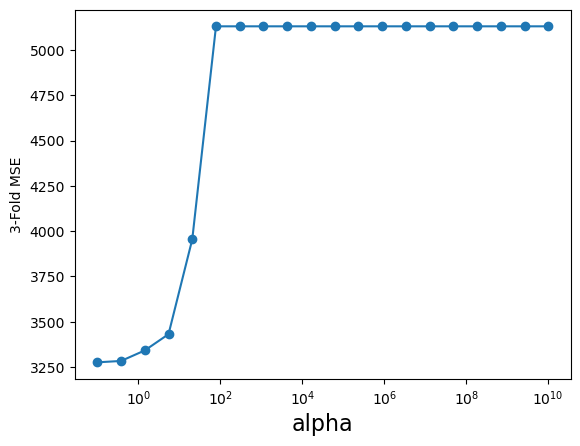

In [84]:
# Ahora entrenamos usando LASSO

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv=3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print(f'MSE Modelo Lasso (train):  {mseTrainModelLasso:.4f}')
print(f'MSE Modelo Lasso (test) : {mseTestModelLasso:.4f}')

print(f'RMSE Modelo Lasso (train): {np.sqrt(mseTrainModelLasso):.4f}')
print(f'RMSE Modelo Lasso (test) : {np.sqrt(mseTestModelLasso):.4f}')

feature_names = airbnb_train.columns[rest_of_columns] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,f'{wi:.4f}')

MSE Modelo Lasso (train):  3260.3763
MSE Modelo Lasso (test) : 3479.6491
RMSE Modelo Lasso (train): 57.0997
RMSE Modelo Lasso (test) : 58.9886
Latitude -1.3874
Longitude -1.5453
Accommodates 33.5756
Bathrooms -2.1767
Bedrooms 5.6107
Beds -12.5737
Guests Included -0.0355
Extra People -1.1314
Minimum Nights 1.1139
Maximum Nights 0.0000
Availability 30 12.7984
Availability 60 -0.0000
Availability 90 -7.3823
Availability 365 0.6535
Number of Reviews -3.1027
Bedrooms_Squared -9.4289
Bed_Bath_Rooms 28.9487


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END .......................................

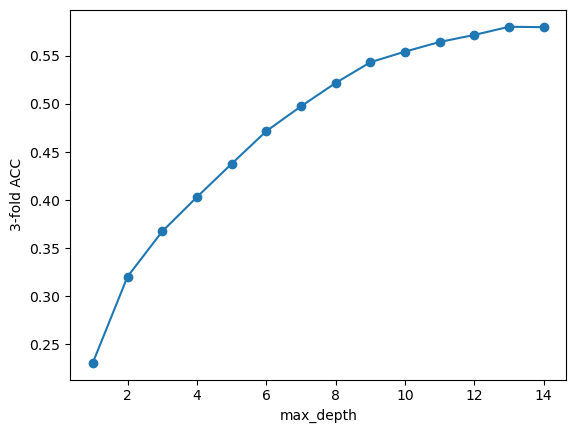

In [86]:
# Ahora entrenamos usando Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters, cv=3, verbose=2)

grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('3-fold ACC')

plt.show()

In [87]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

print("Train: ",randomForest.score(XtrainScaled,y_train))
print("Test: ",randomForest.score(XtestScaled,y_test))

Train:  0.8496793131969028
Test:  0.595450678178704


In [88]:
from sklearn.metrics import mean_squared_error

ytrainRandomForest = randomForest.predict(XtrainScaled)
ytestRandomForest  = randomForest.predict(XtestScaled)
mseTrainModelRandomForest = mean_squared_error(y_train,ytrainRandomForest)
mseTestModelRandomForest = mean_squared_error(y_test,ytestRandomForest)

print(f'MSE Modelo RandomForest (train):  {mseTrainModelRandomForest:.4f}')
print(f'MSE Modelo RandomForest (test) : {mseTestModelRandomForest:.4f}')

print(f'RMSE Modelo RandomForest (train): {np.sqrt(mseTrainModelRandomForest):.4f}')
print(f'RMSE Modelo RandomForest (test) : {np.sqrt(mseTestModelRandomForest):.4f}')

MSE Modelo RandomForest (train):  771.0976
MSE Modelo RandomForest (test) : 2202.2031
RMSE Modelo RandomForest (train): 27.7686
RMSE Modelo RandomForest (test) : 46.9276


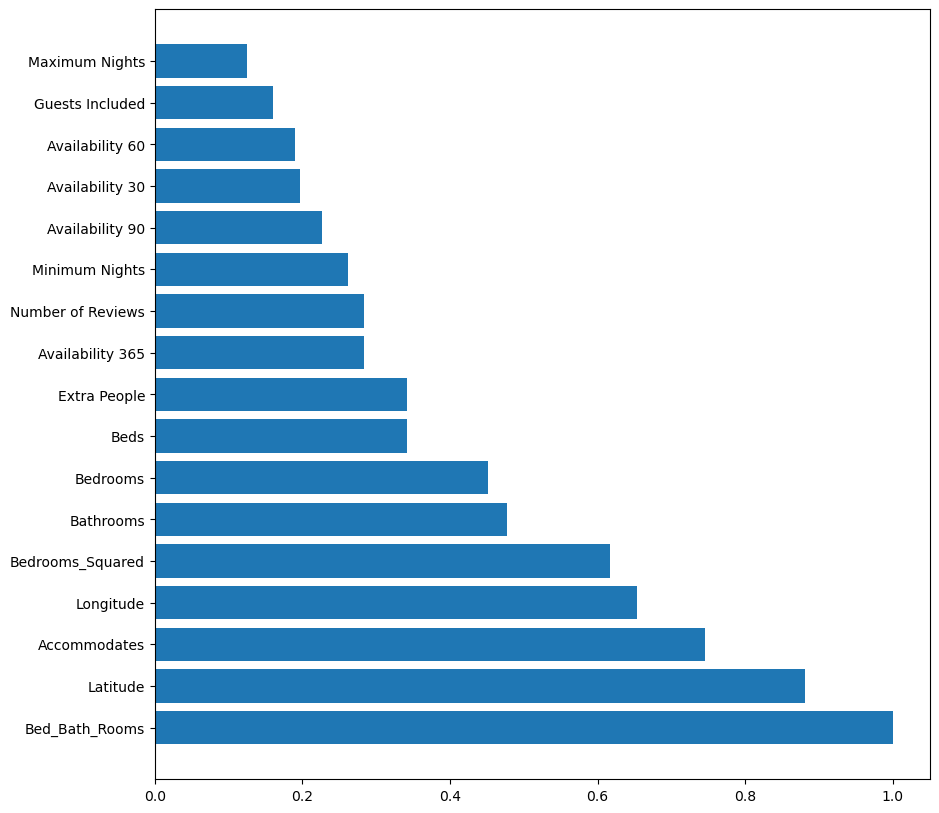

In [89]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

# 5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.


| *Para el modelo Lasso Obtuvimos* | *Para el modelo RandomForest Obtuvimos* | 
| ---------------------------------| ---------------------------------| 
| best mean cross-validation score: -3275.435 | best mean cross-validation score: 0.580 | 
| best parameters: {'alpha': 0.1} | best parameters: {'max_depth': 13} |
| MSE Modelo Lasso (train):  3260.3763 | MSE Modelo RandomForest (train):  771.0976 |
| MSE Modelo Lasso (test) : 3479.6491 | MSE Modelo RandomForest (test) : 2202.2031 | 
| RMSE Modelo Lasso (train): 57.0997 | RMSE Modelo RandomForest (train): 27.7686 | 
| RMSE Modelo Lasso (test) : 58.9886 | RMSE Modelo RandomForest (test) : 46.9276 |

## Por lo que podemos observar el modelo **RandomForest** arroja mejores resultados. 

## Algo que quizas en un primer momento NO parecía que podría ser tan notorio, es la importancia que toma la feature creada **"Bed_Bath_Rooms"** 
## Otras features que destacaron fueron **"Latitude"** y **"Longitude"**, que estuvieron por encima de lo que mostraba el **"Mutual information score"**
## donde la feature mas importante es **"Accommodates"**, la cual ahora se situa entre **"Latitude"** y **"Longitude"** 

## Quizas para una siguiente iteración podríamos intentar buscar datos en otras fuentes que nos sirvan para realizar imputación en
## por ejemplo en **"Square Feet"** o **"Price"** y ver si con eso se mejora el modelo

## También podríamos intentar identificar y eliminar **OUTLIERS**, que es algo que NO se realizó durante este proceso. 
## Esto podría mejorar el **MSE** y **RMSE**, pero a mi me quedan dudas. Habría que probar e iterar. 

## Por el momento las pruebas finalizan aqui 